In [47]:
from scipy.fft import fft
%pylab notebook
import os
import sys
import numpy as np
import matplotlib
from time import sleep, time
from pylab import *
from datetime import datetime

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['fft', 'blackman', 'power', 'datetime', 'linalg', 'random', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


[        0.  10000000.  20000000. ... -30000000. -20000000. -10000000.]


<IPython.core.display.Javascript object>


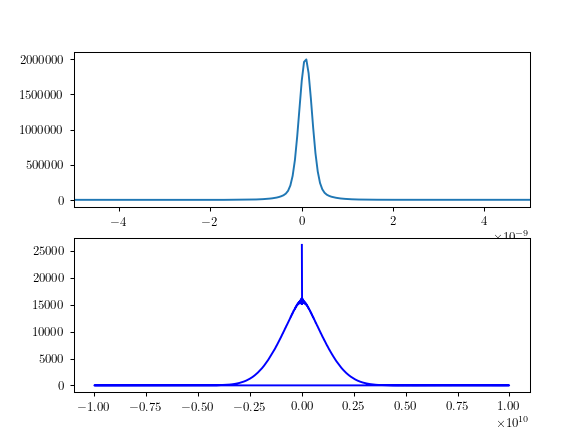

(-5e-09, 5e-09)

In [15]:
g11 = np.load('20200804_1627_cross_correlation_nbins-2000_binwidth-50_signal1.npy')
t = linspace(-49950, 50000, 2000)*1e-12
N = 2000
T = 50e-12
gf = fft(g11)
f = np.linspace(0.0, 1.0/(2.0*T), N//2)
from scipy.signal import blackman
w = blackman(len(g11))
gwf = fft(g11*w)

fourier = np.fft.fft(g11)
n = g11.size
timestep = 50e-12
freq = np.fft.fftfreq(n, d=timestep)
print(freq)

fig, ax = subplots(2,1)

ax[0].plot(t, g11)
ax[1].plot(freq, 2.0/n * np.abs(fourier), '-b')
ax[0].set_xlim(-0.5e-8,0.5e-8)
#ax[1].legend()

In [16]:
from scipy.optimize import curve_fit

def appfunc(t, a, sigma):
    return a/sigma/np.sqrt(2*pi)*e**(-1/2*(t)**2/(sigma**2))

def optgauss(xdata, ydata, p0):
    popt, pcov = curve_fit(appfunc, xdata, ydata, p0)
    return [popt,pcov]

def appfunclorentz(t, a, gamma):
    return a/pi/gamma*(gamma**2/(t**2+gamma**2))

def optlorentz(xdata, ydata, p0):
    popt, pcov = curve_fit(appfunc, xdata, ydata, p0)
    return [popt,pcov]

<IPython.core.display.Javascript object>


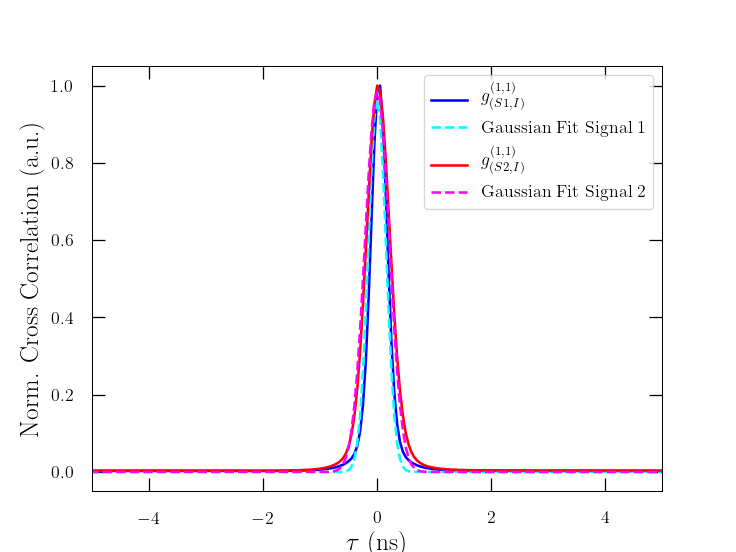

Text(-0.1, 4.7, 'Cross Correlation of the two signal arms')

In [64]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

#set global plotting parameters
linew = 2.0 #line width
#msize = 5 #marker size
axew = 1.0 #axes width

#set the distance to offset the numbers from the ticks
numpad = 15

#set global tick parameters
majw = axew #major tick width
majl = 10.0 #major tick length
minw = axew #minor tick width
minl = 5.0 #minor tick length

#set global font sizes
axefont = 14 #axis label font size
numsize = 14 #axis number font size
legfont = 14 #legend font size
labelfont=20

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
fig.set_facecolor('w')

ax.tick_params(axis='x',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
ax.tick_params(axis='x',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
ax.tick_params(axis='y',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
ax.tick_params(axis='y',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')


g111 = np.load('20200804_1627_cross_correlation_nbins-2000_binwidth-50_signal1.npy')
g112 = np.load('20200804_1627_cross_correlation_nbins-2000_binwidth-50_signal2.npy')
t = linspace(-50000, 49950, 2000)*1e-12

gopt, gcov = optgauss(t, g111, p0=[1e-2, 1e-9])

ax.plot(t*1e9, g111/max(g111), color= 'blue', lw = linew, label = r'$g^{(1,1)}_{(S1,I)}$')
ax.plot(t*1e9, appfunc(t, gopt[0], gopt[1])/max(g111), '--', lw = linew, color = 'aqua', label = 'Gaussian Fit Signal 1')

gopt, gcov = optlorentz(t, g111, p0=[1e-2, 1e-9])
#ax.plot(t*1e9, appfunc(t, gopt[0], gopt[1])/1000000, '--', lw = linew, color = 'navy', label = 'Lorentzian Fit Signal1')

gopt, gcov = optgauss(t, g112, p0=[1e-2, 1e-9])

ax.plot(t*1e9, g112/max(g112), color= 'red', lw = linew, label = r'$g^{(1,1)}_{(S2,I)}$')
ax.plot(t*1e9, appfunc(t, gopt[0], gopt[1])/max(g112), '--', lw = linew, color = 'magenta', label = 'Gaussian Fit Signal 2')

ax.set_title('Gaussian fit to cross-correlation', fontsize = 30, y=4.7, x=-0.1)
ax.legend(fontsize = legfont)
#ax.set_ylim(0,2.2e6)
ax.set_xlim(-5,5)

ax.set_xlabel(r'$\tau$ (ns)', fontsize = labelfont)
ax.set_ylabel('Norm. Cross Correlation (a.u.)', fontsize = labelfont)
ax.set_title('Cross Correlation of the two signal arms', fontsize = labelfont)

In [35]:
print(gcov)
print(gopt)

[[2.71961335e-07 1.27498605e-14]
 [1.27498605e-14 1.80081083e-21]]
[1.47387474e-02 1.04177245e-09]


In [23]:
from scipy.optimize import curve_fit

def appg2herald(t, a, sigma, b):
    return a - b/sigma/np.sqrt(2*pi)*e**(-1/2*(t)**2/(sigma**2))

def optherald(xdata, ydata, p0):
    popt, pcov = curve_fit(appg2herald, xdata, ydata, p0)
    return [popt,pcov]

<IPython.core.display.Javascript object>


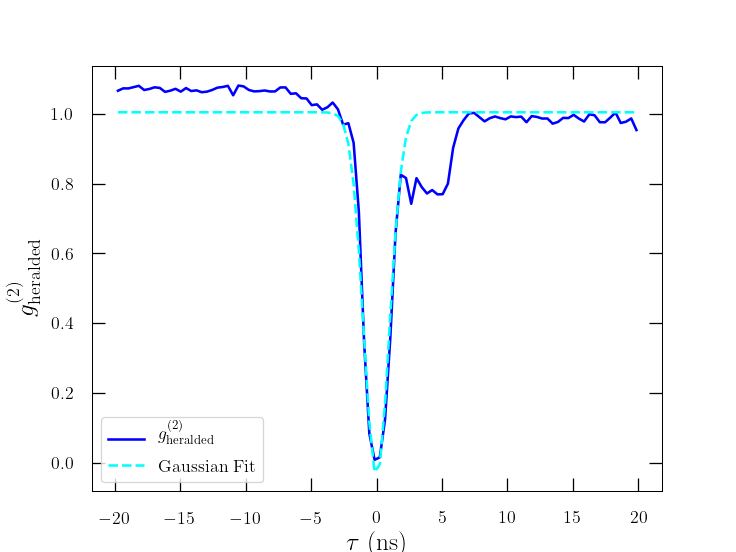

Text(0, 0.5, '$g^{(2)}_{\\text{heralded}}$')

In [66]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
fig.set_facecolor('w')

ax.tick_params(axis='x',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
ax.tick_params(axis='x',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
ax.tick_params(axis='y',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
ax.tick_params(axis='y',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')


g2 = np.load('20200804_1525_g2_heralded_400_binwidth_100_nbins.npy')
t = linspace(-19750, 19850, 100)*1e-12

gopt, gcov = optherald(t, g2, p0=[1, 1e-9, 1e-9])

ax.plot(t*1e9, g2, color= 'blue', lw = linew, label = r'$g^{(2)}_{\text{heralded}}$')
ax.plot(t*1e9, appg2herald(t, gopt[0], gopt[1], gopt[2]), '--', lw = linew, color = 'aqua', label = 'Gaussian Fit')


ax.set_title('Gaussian fit to cross-correlation', fontsize = 30, y=4.7, x=-0.1)
ax.legend(fontsize = legfont)
#ax.set_ylim(0,2.2e6)
#ax.set_xlim(-5,5)

ax.set_xlabel(r'$\tau$ (ns)', fontsize = labelfont)
ax.set_ylabel(r'$g^{(2)}_{\text{heralded}}$', fontsize = labelfont)

In [33]:
max(g112)

2026067